## Downloading Image Files and Metadata with ISIC API

If you are running this file for the first time run the following 3 cells, if you have already run this preprocessing before, you do not need to redownload the data and thus can comment out the following 3 cells.

**Warning: downloading the data for the first time will take quite a while. Likely over an hour.**

In [9]:
# Comment this code if you are not running for the first time, as you will already have downloaded the data.
!pip install isic-cli

In [10]:
# Comment this code if you are not running for the first time, as you will already have downloaded the data.

!isic image download images/

If you have been granted special permissions, logging in with `isic user login` might return more data.


In [13]:
# Comment this code if you are not running for the first time, as you will already have downloaded the data.

!isic metadata download > metadata.csv

python(19393) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


If you have been granted special permissions, logging in with `isic user login` might return more data.



### Reading in metadata

Reading in downloaded metadata from csv into a pandas dataframe.

In [15]:
import pandas as pd
metadata_df = pd.read_csv("metadata.csv")

/var/folders/w3/pjllskrd0p3frb_rpn7jnh0m0000gn/T/ipykernel_12679/2168462714.py:2: DtypeWarning: Columns (6,7,9,10,11,12,13,14,15,16,17,18,19,21,22,23,25,26,27,28,29,30,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv("metadata.csv")


In [16]:
category_counts = metadata_df['diagnosis_1'].value_counts()
category_counts

diagnosis_1
Benign           496699
Malignant         19797
Indeterminate      3068
Name: count, dtype: int64

In [3]:
metadata_df.isna().sum()

NameError: name 'metadata_df' is not defined

In [4]:
metadata_df['diagnosis_1'].value_counts()

NameError: name 'metadata_df' is not defined

In [5]:
metadata_df.describe()

NameError: name 'metadata_df' is not defined

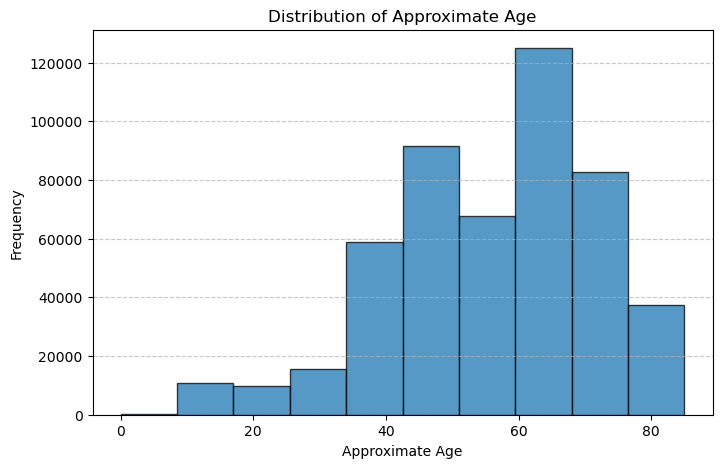

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(metadata_df['age_approx'], edgecolor='black', alpha=0.75)
plt.xlabel("Approximate Age")
plt.ylabel("Frequency")
plt.title("Distribution of Approximate Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
metadata_df['sex'] = metadata_df['sex'].map({'male': 1, 'female': 0})

In [8]:
metadata_df['diagnosis_1'].value_counts()

diagnosis_1
Benign           480700
Malignant         18630
Indeterminate      3010
Name: count, dtype: int64

In [9]:
filter_df = metadata_df.drop(columns=['attribution', 'copyright_license', 'acquisition_day',
                                      'anatom_site_special', 'benign_malignant', 'concomitant_biopsy',
                                      'dermoscopic_type', 'diagnosis', 'diagnosis_2', 'diagnosis_3',
                                      'diagnosis_4', 'diagnosis_5', 'diagnosis_confirm_type', 'mel_class',
                                      'mel_mitotic_index', 'mel_thick_mm', 'mel_type', 'mel_ulcer',
                                      'melanocytic', 'nevus_type', 'rcm_case_id'])


In [10]:
filtered_df2 = filter_df[filter_df['diagnosis_1'] != 'Indeterminate']  # Drop Indeterminate
filtered_df2['diagnosis_1'] = filtered_df2['diagnosis_1'].map({'Malignant': 1, 'Benign': 0})
columns_to_encode = ['anatom_site_general','image_type','tbp_tile_type']

# Apply one-hot encoding
df_encoded = pd.get_dummies(filtered_df2, columns=columns_to_encode, dtype=int)

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_17938/874870015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['diagnosis_1'] = filtered_df2['diagnosis_1'].map({'Malignant': 1, 'Benign': 0})


In [11]:
selected_columns = ['age_approx', 'sex','clin_size_long_diam_mm','anatom_site_general_anterior torso','anatom_site_general_head/neck','anatom_site_general_lateral torso','anatom_site_general_lower extremity','anatom_site_general_oral/genital','anatom_site_general_palms/soles','anatom_site_general_posterior torso','anatom_site_general_upper extremity','diagnosis_1']

correlation_matrix = df_encoded[selected_columns].corr()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

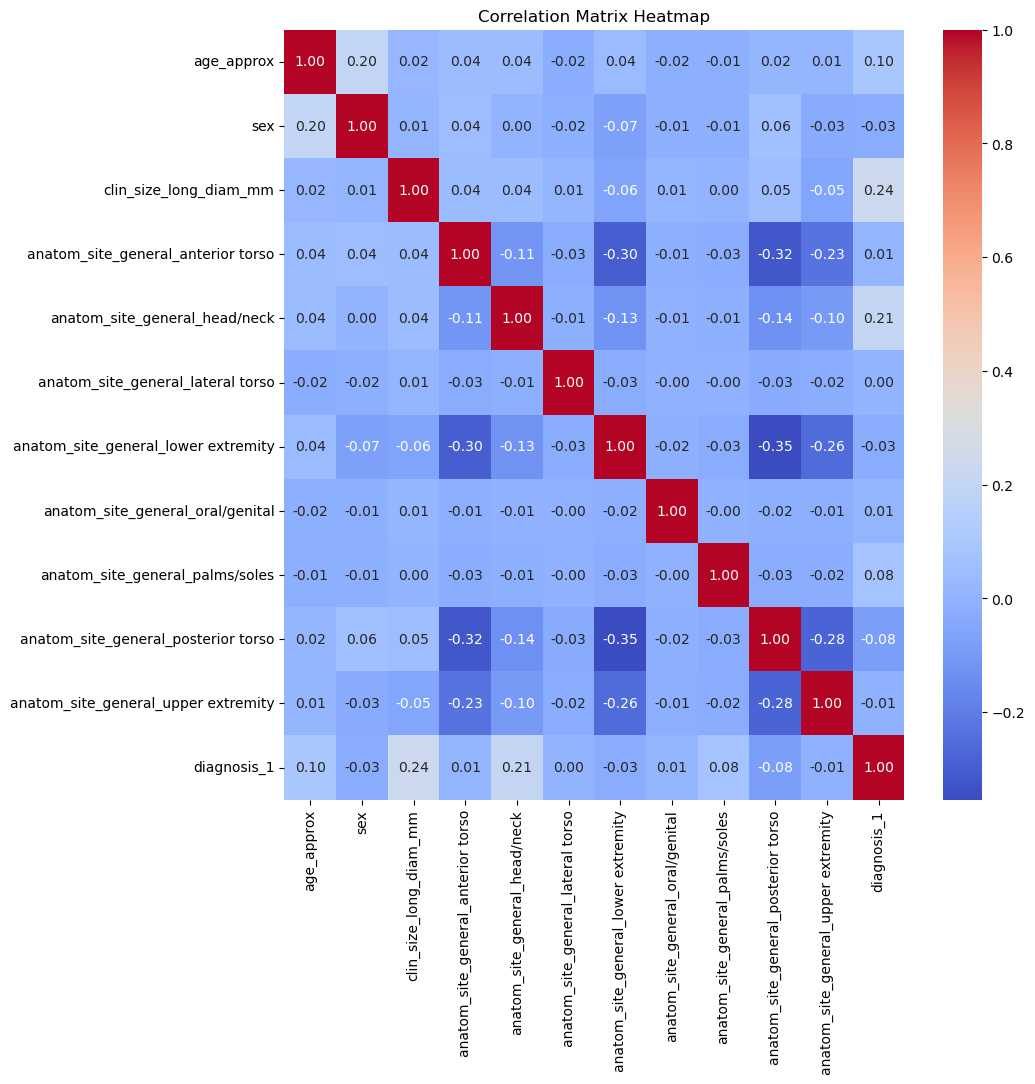

In [12]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix Heatmap")

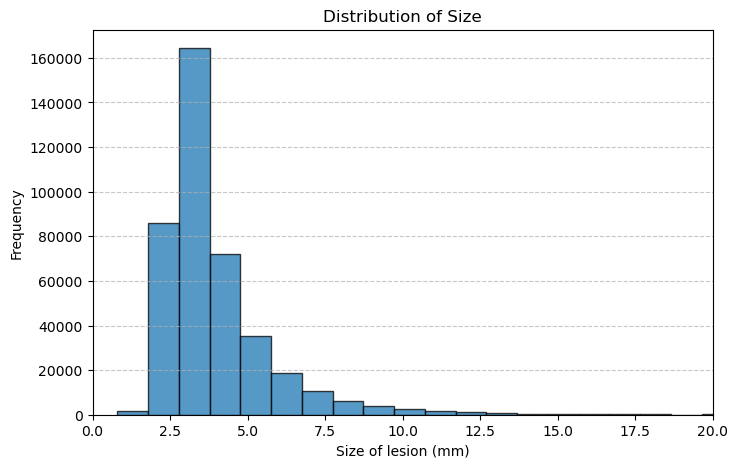

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(metadata_df['clin_size_long_diam_mm'], bins=100,edgecolor='black', alpha=0.75)
plt.xlabel("Size of lesion (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 20)
plt.show()

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_17938/2251040342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


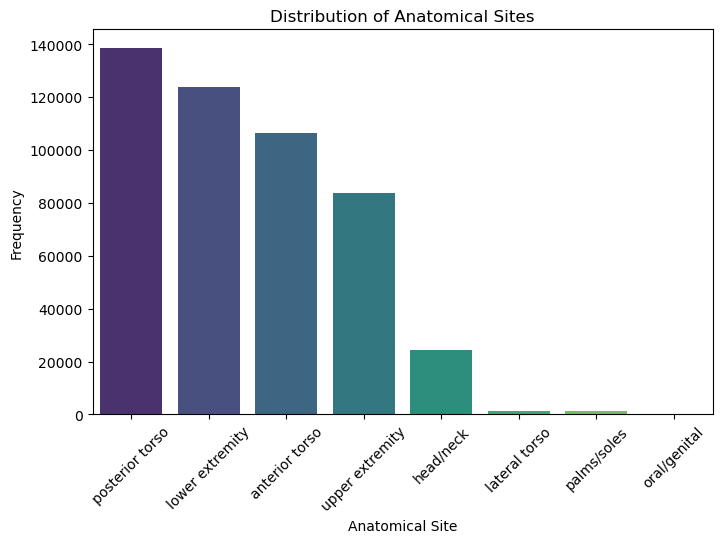

In [14]:
category_counts = metadata_df['anatom_site_general'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

plt.xlabel("Anatomical Site")
plt.ylabel("Frequency")
plt.title("Distribution of Anatomical Sites")

plt.xticks(rotation=45)

plt.show()

/var/folders/0b/33n254b510726mq07nrfcfbw0000gn/T/ipykernel_17938/3010833806.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


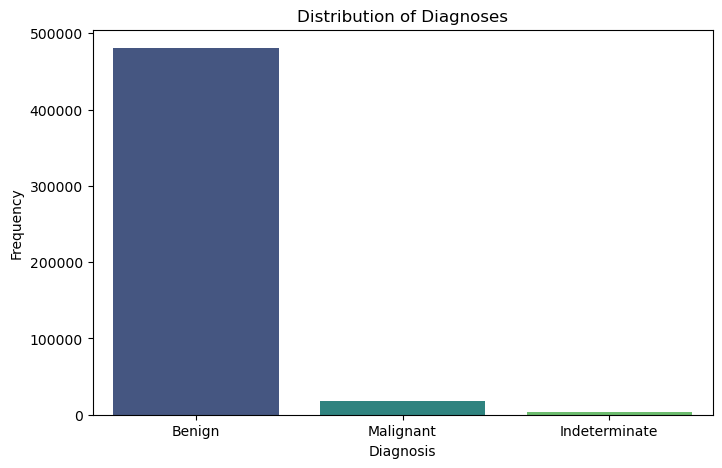

In [15]:
category_counts = metadata_df['diagnosis_1'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

plt.xlabel("Diagnosis")
plt.ylabel("Frequency")
plt.title("Distribution of Diagnoses")

plt.show()

In [16]:
filtered_df2.head()

,isic_id,age_approx,anatom_site_general,clin_size_long_diam_mm,diagnosis_1,family_hx_mm,fitzpatrick_skin_type,image_type,lesion_id,patient_id,personal_hx_mm,pixels_x,pixels_y,sex,tbp_tile_type
0,ISIC_9536278,45.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN
1,ISIC_7650956,65.0,upper extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN
2,ISIC_5730927,85.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,1.0,NaN
3,ISIC_4305055,85.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN
4,ISIC_5681611,85.0,lower extremity,NaN,1.0,NaN,NaN,dermoscopic,NaN,NaN,NaN,600,450,0.0,NaN


In [17]:
filtered_df3 = filtered_df2.drop(columns=['family_hx_mm','fitzpatrick_skin_type','personal_hx_mm','tbp_tile_type'])

In [18]:
filtered_df3.head()

,isic_id,age_approx,anatom_site_general,clin_size_long_diam_mm,diagnosis_1,image_type,lesion_id,patient_id,pixels_x,pixels_y,sex
0,ISIC_9536278,45.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0
1,ISIC_7650956,65.0,upper extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0
2,ISIC_5730927,85.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,1.0
3,ISIC_4305055,85.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0
4,ISIC_5681611,85.0,lower extremity,NaN,1.0,dermoscopic,NaN,NaN,600,450,0.0


In [25]:
metadata = filtered_df3[['isic_id','age_approx','clin_size_long_diam_mm','sex','diagnosis_1']]
metadata = metadata.dropna(subset=['diagnosis_1']) # drop rows that don't have label
# train, valid, test split
from sklearn.model_selection import train_test_split
train_meta, temp_df = train_test_split(
    metadata, test_size=0.3, random_state=42, stratify=metadata['diagnosis_1']
)

val_meta, test_meta = train_test_split(
    temp_df, test_size=1/3, random_state=42, stratify=temp_df['diagnosis_1']
)

In [ ]:
# write splits to CSV
#train_meta.to_csv('train_metadata.csv', index=False)
#val_meta.to_csv('val_metadata.csv', index=False)
#test_meta.to_csv('test_metadata.csv', index=False)

In [19]:
'''
import os
import cv2
import numpy as np
image_folder = "images"
def load_and_flatten_image(image_id, folder):
    image_path = os.path.join(folder, f"{image_id}.jpg")
    
    # Check if file exists
    if not os.path.exists(image_path):
        return None  # Handle missing images
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is None:
        return None

    img = cv2.resize(img, (128, 128))  # Resize to 128x128
    
    # Flatten image into a 1D array
    return img.flatten()
'''

'\nimport os\nimport cv2\nimport numpy as np\nimage_folder = "images"\ndef load_and_flatten_image(image_id, folder):\n    image_path = os.path.join(folder, f"{image_id}.jpg")\n    \n    # Check if file exists\n    if not os.path.exists(image_path):\n        return None  # Handle missing images\n    \n    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale\n    if img is None:\n        return None\n\n    img = cv2.resize(img, (128, 128))  # Resize to 128x128\n    \n    # Flatten image into a 1D array\n    return img.flatten()\n'

In [20]:
#filtered_df3["image_data"] = filtered_df3["isic_id"].apply(lambda x: load_and_flatten_image(x, image_folder)) # add flattened data to dataframe

In [21]:
#type(filtered_df3.loc[0, 'image_data'])

In [22]:
#filtered_df3.to_pickle("image_data.pkl")